I wonder how well the surrogate function works. So I generated a set of MC data using the tuned parameters. I will then compare the generated histograms with those from tuned results.

In [3]:
import yoda
from __future__ import print_function
from future.utils import iteritems
from future.utils import itervalues
from future.utils import iterkeys

import os

import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
input_dir = 'SamplesWithTunedParameters'

In [5]:
processes = [
    ['Wmunu',  '50k'],
    ['Wenu',   '50k'],
    ['Wtaunu', '50k'],
    ['Zmumu',  '50k'],
    ['Ztautau', '50k'],
    ['Zvv', '50k'],
    ['ttbar', '1M'],
    ['vv', '1M']
]
samples = [x[0] for x in processes]
print(samples)
analysis = 'ATLAS_2017_I1635274'

['Wmunu', 'Wenu', 'Wtaunu', 'Zmumu', 'Ztautau', 'Zvv', 'ttbar', 'vv']


In [6]:
def make_ploter(input_dir_, samples, analysis):
    # read yoda files
    input_dir = os.path.join('inputs', input_dir_)
    data_dict = {}
    for sample in samples:
        file_name = os.path.join(input_dir, sample, 'submit', '000000', 'combined.yoda')
        data = yoda.read(file_name)
        data_dict[sample] = data
        
    data_name = analysis+'.yoda'
    ref_data = yoda.read(os.path.join(input_dir, data_name))
    tuned_data = yoda.read(os.path.join(input_dir, 'ipolhistos.yoda'))
    
    # define some ploting styles
    COLORS = ["steelblue", "darkorange", "forestgreen", "firebrick", "darkviolet", "saddlebrown", "plum", 'darkgrey']
    LSTYLES = ['solid']*10
    
    plotkeys = {
        "xlabel": "",
        "ylabel": "Events / Bin",
        "logY": True,
        "title": r"new physics search in mono-jet channel",
        'LegendFontSize': 'large',
        "ratioymin": 0.8,
        "ratioymax": 1.2,
        'ratiogrid': False
    }
    
    def ploter(name, xaxis_label=" ", logY=False, out_file_name='test', y_limis=(1e-3, 1e4)):
        hist_name = '/'+analysis+'/'+name
        total = None
        for sample in samples:
            hist = data_dict[sample][hist_name]
            if total is None:
                total = hist.clone()
            else:
                total += hist
                
        total.setAnnotation('linecolor', COLORS[2])
        total.setAnnotation('linestyle', LSTYLES[2])
        total.setAnnotation('ratioref', True)
        total.setAnnotation('Title', "Generated")
        total.setAnnotation('line', 'bar')
        
        ref_hist = ref_data["/REF"+hist_name]
        ref_hist.setAnnotation("ratioref", True)
        ref_hist.setAnnotation('linecolor', 'black')
        ref_hist.setAnnotation('line', None)
        ref_hist.setAnnotation('errorbars', True)
        ref_hist.setAnnotation('errorbarscolor', 'black')
        ref_hist.setAnnotation('Title', "Ref. Data")
        
        mc_hist = ref_data["/REF"+hist_name.replace('y01', 'y02')]
        mc_hist.setAnnotation('linecolor', COLORS[0])
        mc_hist.setAnnotation('linestyle', LSTYLES[0])
        mc_hist.setAnnotation('Title', "Ref. MC")
        mc_hist.setAnnotation('line', 'bar')
        
        
        tuned_hist = tuned_data[hist_name]
#         tuned_hist.setAnnotation("ratioref", True)
#         tuned_hist.setAnnotation('linecolor', COLORS[1])
#         tuned_hist.setAnnotation('linestyle', LSTYLES[1])
        tuned_hist.setAnnotation('Title', "Tuned")
        tuned_hist.setAnnotation('line', None)
        tuned_hist.setAnnotation('errorbars', True)
        tuned_hist.setAnnotation('errorbarscolor', 'black')
        print(sample," of tuned:", tuned_hist.integral())
        
        plotkeys['xlabel'] = xaxis_label
        plotkeys['logY'] = logY
        plotkeys['ymin'] = y_limis[0]
        plotkeys['ymax'] = y_limis[1]
        
        out = os.path.join('output', input_dir_, "para_vs_generated")
        if not os.path.exists(out):
            os.makedirs(out)
        out = os.path.join(out, out_file_name+'.pdf')

        fig, (axmain, axratio) = yoda.plot([total, tuned_hist], 
                                           outfile=out, ratio=True, **plotkeys)
    
    return ploter

In [7]:
xaxis_renames = {
    'd01-x01-y01': ['$W \\rightarrow \\mu\\nu$, $E_{T}^{miss}$ [GeV]', True, 'wmunu_met'],
    'd02-x01-y01': ['$W \\rightarrow \\mu\\nu$, leading jet $pT$ [GeV]', True, 'wmunu_pT'],
    'd03-x01-y01': ['$W \\rightarrow e\\nu$, $E_{T}^{miss}$ [GeV]', True, 'wenu_met'],
    'd04-x01-y01': ['$W \\rightarrow e\\nu$, leading jet $pT$ [GeV]', True, 'wenu_pT'],
    'd05-x01-y01': ['$Z \\rightarrow \\mu\\mu$, $E_{T}^{miss}$ [GeV]', True, 'Zmumu_met'],
    'd06-x01-y01': ['$Z \\rightarrow \\mu\\mu$, leading jet $pT$ [GeV]', True, 'Zmumu_pT'],
    'd07-x01-y01': ['ttbar, $E_{T}^{miss}$ [GeV]', True, 'ttbar_met'],
    'd08-x01-y01': ['ttbar, leading jet $pT$ [GeV]', True, 'ttbar_pT'],
#     'd09-x01-y01': ['$E_{T}^{miss}$ [GeV]', True, 'sr_met'],
#     'd10-x01-y01': ['leading jet $pT$ [GeV]', True, 'sr_pT'],
#     'd11-x01-y01': ['leading jet $\\eta$ [GeV]', False, 'sr_eta'],
#     'd12-x01-y01': ['$n_{jets}$ [GeV]', False, 'sr_njets']
}

In [35]:
pp = make_ploter(input_dir, samples, analysis)

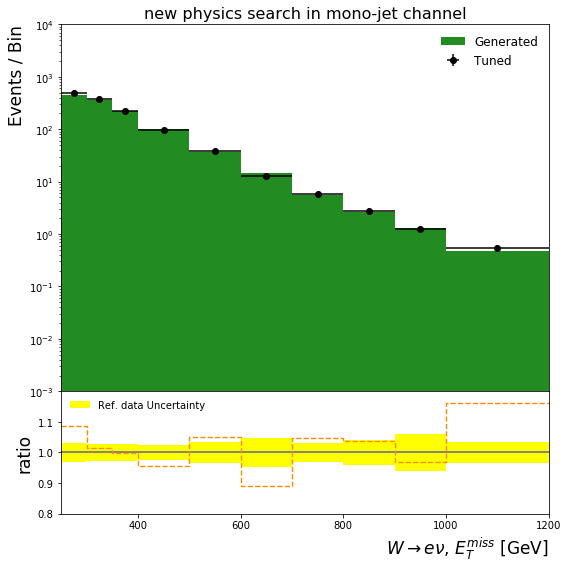

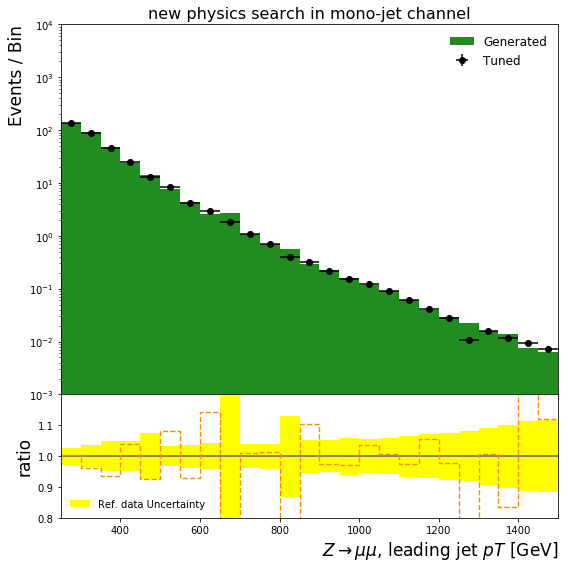

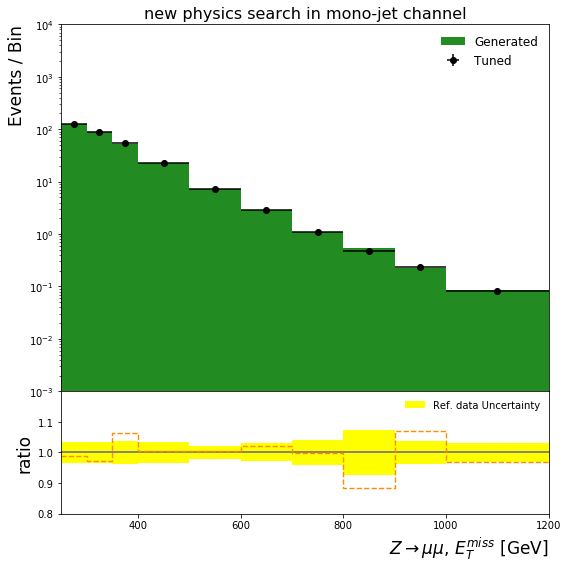

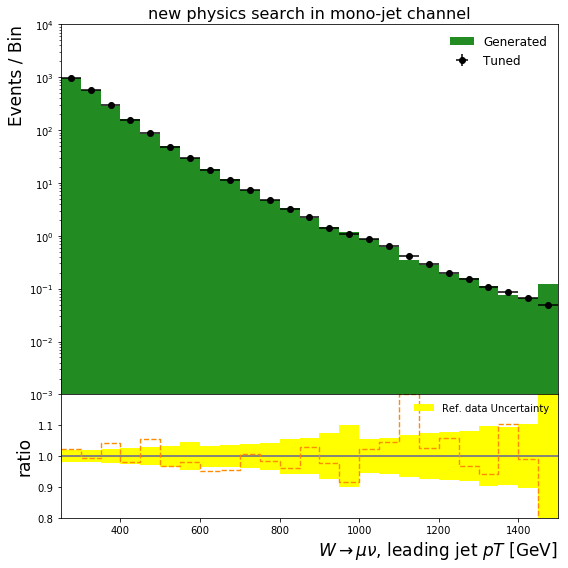

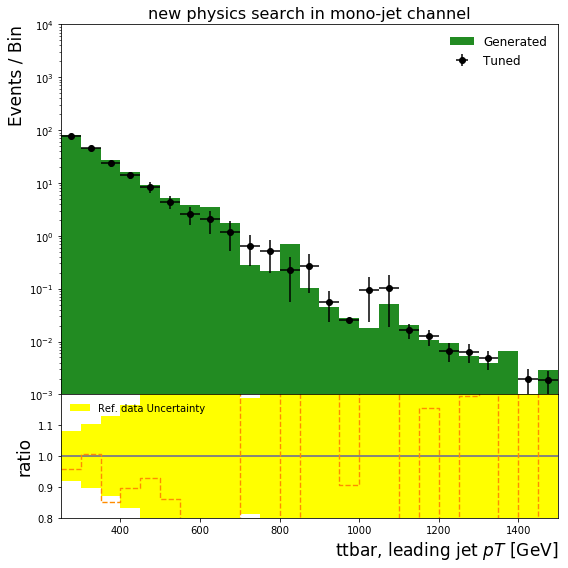

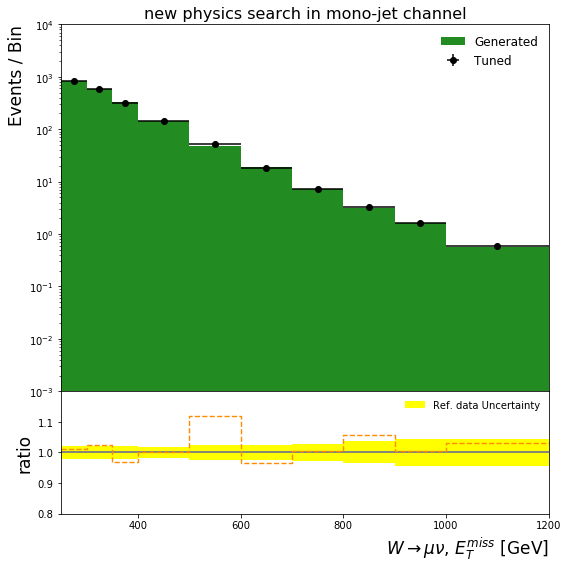

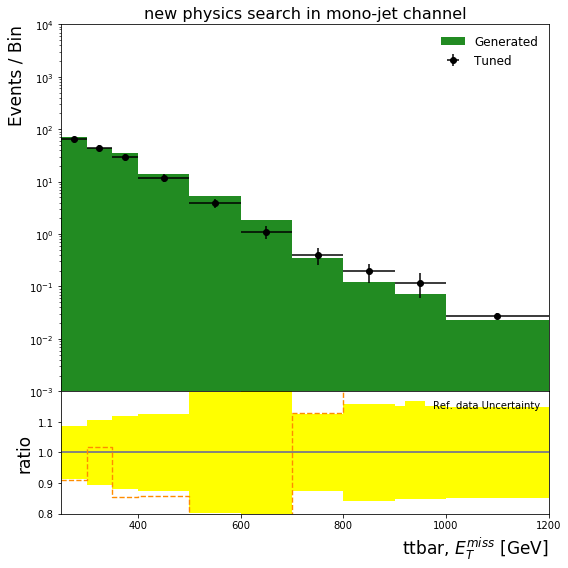

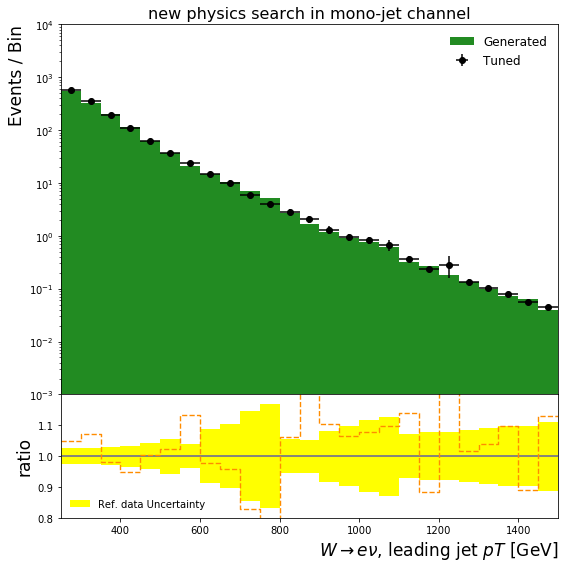

In [36]:
for name in iterkeys(xaxis_renames):
    logY = xaxis_renames[name][1]
    if logY:
        pp(name, *(xaxis_renames[name]))
    elif "d12" in name:
        pp(name, *(xaxis_renames[name]), y_limis=(0, 1.4e5))
    elif "d11" in name:
        pp(name, *(xaxis_renames[name]), y_limis=(0, 2e5))
    else:
        pp(name, *(xaxis_renames[name]), y_limis=(0, 4000))

In [10]:
name = "d12-x01-y01"
pp2(name, *(xaxis_renames[name]), y_limis=(0, 1.4e5))

KeyError: 'd12-x01-y01'

In [20]:
def get_total(input_dir_, samples, analysis):
    # read yoda files
    input_dir = os.path.join('inputs', input_dir_)
    data_dict = {}
    for sample in samples:
        file_name = os.path.join(input_dir, sample, 'submit', '000000', 'combined.yoda')
        data = yoda.read(file_name)
        data_dict[sample] = data
        
    data_name = analysis+'.yoda'
    ref_data = yoda.read(os.path.join(input_dir, data_name))
    tuned_data = yoda.read(os.path.join(input_dir, 'ipolhistos.yoda'))
    
    # define some ploting styles
    COLORS = ["steelblue", "darkorange", "forestgreen", "firebrick", "darkviolet", "saddlebrown", "plum", 'darkgrey']
    LSTYLES = ['solid']*10
    
    plotkeys = {
        "xlabel": "",
        "ylabel": "Events / Bin",
        "logY": True,
        "title": r"new physics search in mono-jet channel",
        'LegendFontSize': 'large',
        "ratioymin": 0.8,
        "ratioymax": 1.2,
        'ratiogrid': False
    }
    
    def ploter(name):
        hist_name = '/'+analysis+'/'+name
        total = None
        for sample in samples:
            hist = data_dict[sample][hist_name]
            if total is None:
                total = hist.clone()
            else:
                total += hist
            
            print(sample,"with tuned parameters:", hist.integral())
            
        print("Total with tuned parameters:", total.integral())
    
    return ploter

In [21]:
pp2 = get_total(input_dir, samples, analysis)

In [22]:
name = "d12-x01-y01"
pp2(name)

Wmunu with tuned parameters: 10787.31
Wenu with tuned parameters: 15407.19
Wtaunu with tuned parameters: 41693.96
Zmumu with tuned parameters: 117.0192
Ztautau with tuned parameters: 392.6798
Zvv with tuned parameters: 118353.7
ttbar with tuned parameters: 3727.736
vv with tuned parameters: 1567.778
Total with tuned parameters: 192047.373
